### 파일 개요
---
**1. 기본 정보 확인 - 데이터 크기, 타입  
2. 데이터 미리보기, 기술통계 확인  
3. 결측치 분석 - Age(20%), Cabin(77%), Embarked(0.2%)에 결측치 있음  
4. 시각화를 통한 탐색**  
- 범주형 변수 분포 (생존 여부, 승객 등급, 성별)
- 연속형 변수 분포 (나이, 운임)
- 각 변수와 생존율 간의 관계 분석
- 상관관계 히트맵

In [8]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import matplotlib.font_manager as fm
plt.rc('axes', unicode_minus=False)
plt.rc('font', family='Malgun Gothic')

In [9]:
titanic_url = 'https://bit.ly/fc-ml-titanic'
df = pd.read_csv(titanic_url)

#### 1. 기본 정보

In [15]:
print("\n===== 데이터 기본 정보 =====")
print(f"데이터 크기: {df.shape}")
print("\n데이터 타입 정보:")
print(df.info())


===== 데이터 기본 정보 =====
데이터 크기: (891, 12)

데이터 타입 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


#### 2. 데이터 미리보기

In [16]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#### 3. 기술통계


In [17]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#### 4. 결측치

In [ ]:
missing_values = df.isnull().sum()
missing_ratio = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_ratio], axis=1)
missing_data.columns = ['결측치 수', '결측치 비율(%)']
print(missing_data)


===== 결측치 확인 =====
             결측치 수  결측치 비율(%)
PassengerId      0   0.000000
Survived         0   0.000000
Pclass           0   0.000000
Name             0   0.000000
Sex              0   0.000000
Age            177  19.865320
SibSp            0   0.000000
Parch            0   0.000000
Ticket           0   0.000000
Fare             0   0.000000
Cabin          687  77.104377
Embarked         2   0.224467


### 5. 시각화

#### 5.1 범주형 변수 분포

In [20]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, '생존 여부 분포')

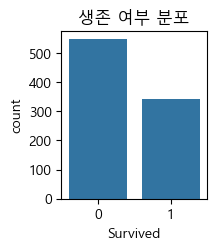

In [25]:
plt.subplot(2, 3, 1)
sns.countplot(x='Survived', data=df)
plt.title('생존 여부 분포')

Text(0.5, 1.0, '승객 등급 분포')

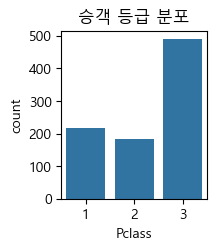

In [26]:
plt.subplot(2, 3, 2)
sns.countplot(x='Pclass', data=df)
plt.title('승객 등급 분포')

Text(0.5, 1.0, '성별 분포')

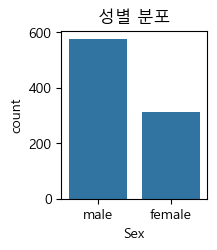

In [27]:
plt.subplot(2, 3, 3)
sns.countplot(x='Sex', data=df)
plt.title('성별 분포')

Text(0.5, 1.0, '형제/배우자 수 분포')

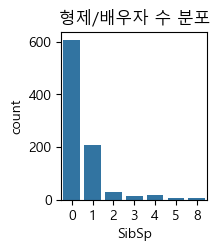

In [28]:
plt.subplot(2, 3, 4)
sns.countplot(x='SibSp', data=df)
plt.title('형제/배우자 수 분포')

Text(0.5, 1.0, '부모/자녀 수 분포')

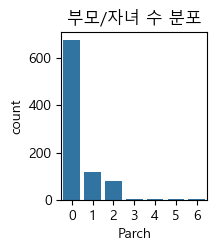

In [29]:
plt.subplot(2, 3, 5)
sns.countplot(x='Parch', data=df)
plt.title('부모/자녀 수 분포')

Text(0.5, 1.0, '승선 항구 분포')

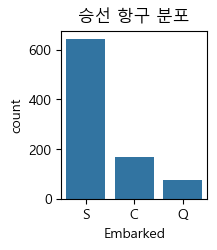

In [30]:
plt.subplot(2, 3, 6)
sns.countplot(x='Embarked', data=df)
plt.title('승선 항구 분포')

In [31]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

#### 5.2 연속형 변수 분포

In [32]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, '나이 분포')

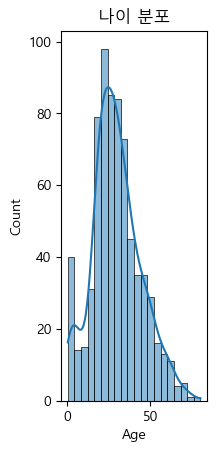

In [33]:
plt.subplot(1, 3, 1)
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('나이 분포')

Text(0.5, 1.0, '운임 분포')

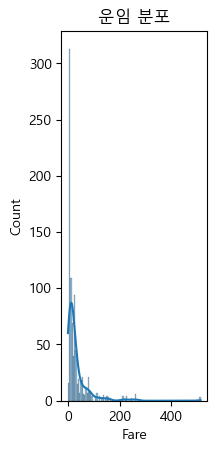

In [34]:
plt.subplot(1, 3, 2)
sns.histplot(df['Fare'], kde=True)
plt.title('운임 분포')

Text(0.5, 1.0, '나이 및 운임 boxplot')

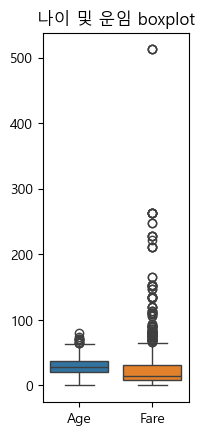

In [35]:
plt.subplot(1, 3, 3)
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('나이 및 운임 boxplot')

In [36]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

#### 5.3 생존율과 변수 간의 관계

In [37]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, '승객 등급별 생존율')

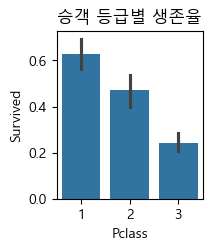

In [38]:
plt.subplot(2, 3, 1)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('승객 등급별 생존율')

Text(0.5, 1.0, '성별 생존율')

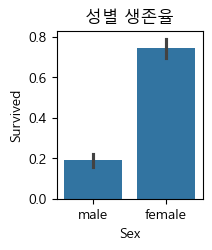

In [39]:
plt.subplot(2, 3, 2)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('성별 생존율')

Text(0.5, 1.0, '형제/배우자 수별 생존율')

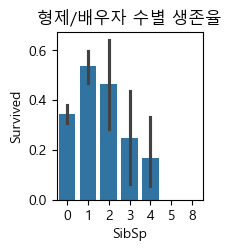

In [40]:
plt.subplot(2, 3, 3)
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('형제/배우자 수별 생존율')

Text(0.5, 1.0, '부모/자녀 수별 생존율')

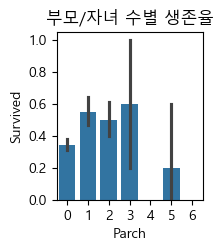

In [41]:
plt.subplot(2, 3, 4)
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('부모/자녀 수별 생존율')

Text(0.5, 1.0, '승선 항구별 생존율')

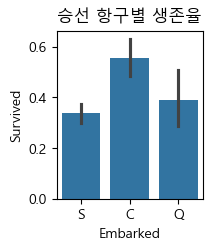

In [42]:
plt.subplot(2, 3, 5)
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('승선 항구별 생존율')

In [43]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

#### 5.4 Age와 Fare의 생존 여부에 따른 분포

In [44]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, '생존 여부에 따른 나이 분포')

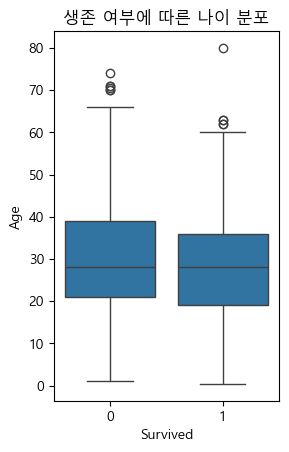

In [45]:
plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('생존 여부에 따른 나이 분포')

Text(0.5, 1.0, '생존 여부에 따른 운임 분포')

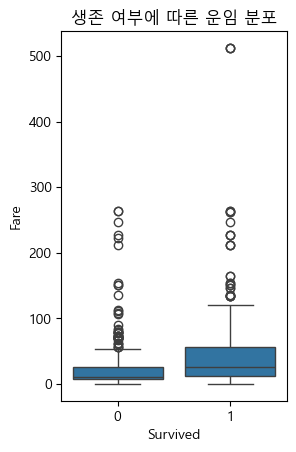

In [46]:
plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('생존 여부에 따른 운임 분포')

In [47]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

#### 5.5 상관관계 분석

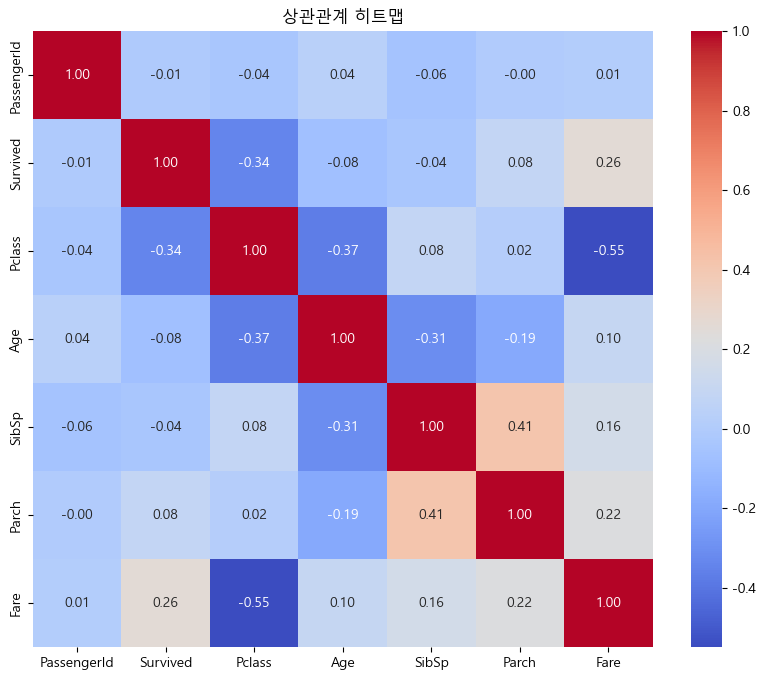

In [48]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관관계 히트맵')
plt.show()

### 6. 데이터 인사이트 정리

In [51]:
print("\n===== 데이터 인사이트 =====")
print("1. 결측치 현황:")
print(f"  - Age: {missing_values['Age']}개 ({missing_ratio['Age']:.2f}%)")
print(f"  - Cabin: {missing_values['Cabin']}개 ({missing_ratio['Cabin']:.2f}%)")
print(f"  - Embarked: {missing_values['Embarked']}개 ({missing_ratio['Embarked']:.2f}%)")

print("\n2. 생존 관련 인사이트:")
# 성별에 따른 생존율
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
print(f"  - 여성 생존율: {gender_survival['female']:.2f}%")
print(f"  - 남성 생존율: {gender_survival['male']:.2f}%")

# 등급에 따른 생존율
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
for i in range(1, 4):
    print(f"  - {i}등급 생존율: {class_survival[i]:.2f}%")

print("\n3. 다음 단계 제안:")
print("  - Age 결측치 처리: 평균, 중앙값 또는 예측 모델을 통한 대체")
print("  - Cabin 결측치 처리: 결측이 많으므로 새로운 범주 생성 또는 특성 추출")
print("  - Embarked 결측치 처리: 최빈값으로 대체")
print("  - Name, Ticket 등 텍스트 데이터에서 유용한 정보 추출")
print("  - 이상치 탐지 및 처리 계획 수립")


===== 데이터 인사이트 =====
1. 결측치 현황:
  - Age: 177개 (19.87%)
  - Cabin: 687개 (77.10%)
  - Embarked: 2개 (0.22%)

2. 생존 관련 인사이트:
  - 여성 생존율: 74.20%
  - 남성 생존율: 18.89%
  - 1등급 생존율: 62.96%
  - 2등급 생존율: 47.28%
  - 3등급 생존율: 24.24%

3. 다음 단계 제안:
  - Age 결측치 처리: 평균, 중앙값 또는 예측 모델을 통한 대체
  - Cabin 결측치 처리: 결측이 많으므로 새로운 범주 생성 또는 특성 추출
  - Embarked 결측치 처리: 최빈값으로 대체
  - Name, Ticket 등 텍스트 데이터에서 유용한 정보 추출
  - 이상치 탐지 및 처리 계획 수립
